<script>
        var code_show=true; //true -> hide code at first
    
        function code_toggle() {
            $('div.prompt').hide(); // always hide prompt
            $('div[style*=\"border-style: dashed"\]').hide(); // hide extra comments, usually log from treasuredata
            $('div.output_stderr').parent().hide();
    
            if (code_show){
                $('div.input').hide();
            } else {
                $('div.input').show();
            }
            code_show = !code_show
        }
        $( document ).ready(code_toggle);
    </script>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

plt.style.use("seaborn-poster")

# Introduction

## Background
*why you conduct this analysis*

## Research Questions
*what you are trying to find out*

# Assumptions and Known Limitations

*what assumptions you put*

# Data Preparation

*where you get the data, how you preprocess it*

In [3]:
df = pd.read_csv("dataset/dummy-bmi-data.csv", sep=';')
df.head()

,id,height_cm,weight_kg,bmi,is_obese,bmi_category,gender
0,1,160,60,23.44,Not obese,Normal,Female
1,2,180,99,30.56,Obese,Obese,Female
2,3,167,80,28.69,Not obese,Overweight,Female
3,4,152,48,20.78,Not obese,Normal,Male
4,5,158,75,30.04,Obese,Obese,Male


# Analysis

## Intuition

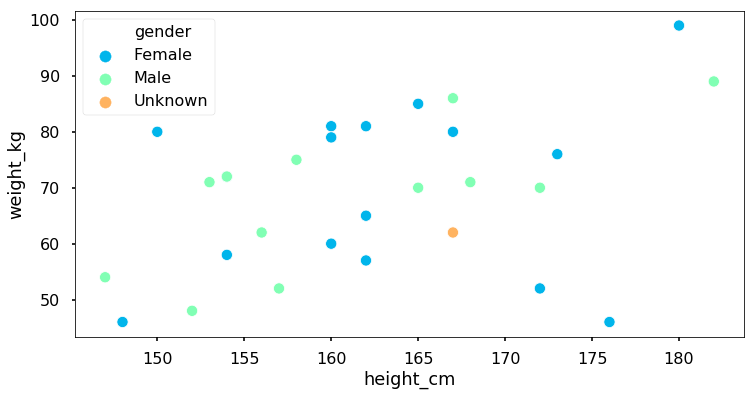

In [4]:
f, ax = plt.subplots(figsize=(12,6))

sns.scatterplot(
    data=df,
    x='height_cm',
    y='weight_kg',
    hue='gender',
    palette='rainbow'
)

plt.legend(loc='best')
plt.show();

## Decision boundary

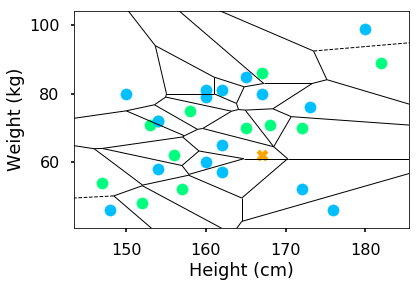

In [23]:
from scipy.spatial import Voronoi, voronoi_plot_2d

vor = Voronoi(np.array(df.loc[(df['gender'] != 'Unknown'),['height_cm','weight_kg']]))
voronoi_plot_2d(vor,
               show_vertices=False,
               show_points=False)

plt.scatter(df.loc[(df['gender'] == 'Male'),'height_cm'], df.loc[(df['gender'] == 'Male'),'weight_kg'],
           c='springgreen')
plt.scatter(df.loc[(df['gender'] == 'Female'),'height_cm'], df.loc[(df['gender'] == 'Female'),'weight_kg'],
           c='deepskyblue')
plt.scatter(df.loc[(df['gender'] == 'Unknown'),'height_cm'], df.loc[(df['gender'] == 'Unknown'),'weight_kg'],
           marker='X', c='orange')
plt.grid(False)

plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show();

## Classification

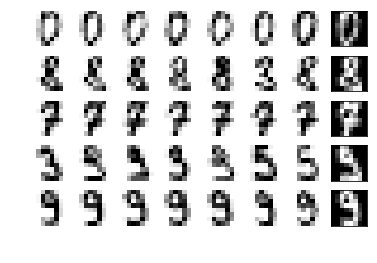

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

mnist = load_digits()

img_rows, img_cols = 8, 8

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.33, random_state=1945)
X_train = X_train.reshape(X_train.shape[0], img_rows * img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows * img_cols)

k = 7
n_samples = 5
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)
X_test = X_test[np.random.choice(len(X_test), n_samples, replace=False)]
knn = clf.kneighbors(X_test)

fig, ax = plt.subplots(n_samples, k+1)
x = X_train[knn[1]].reshape(n_samples, k, img_rows, img_cols)
for i in range(n_samples):
    for j in range(k):
        ax[i][j].imshow(x[i,j,:,:], cmap='Greys')
        ax[i][j].axis('off')
    ax[i][k].imshow(X_test[i].reshape(img_rows, img_cols), cmap='gray')
    ax[i][k].tick_params(axis='both', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
    ax[i][k].grid(False)
plt.show();

# Results and Discussions

*describe what you find and how it can be improved*

# References

[Universitas Al-Azhar Indonesia - Data Mining - Lab 4](https://nbviewer.jupyter.org/github/aliakbars/uai-dm/blob/master/scripts/lab4.ipynb)